# Demo object and attribute predictions


In [25]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
import pylab
from skimage import transform
# display plots in this notebook
%matplotlib inline

import cv2
import os
import sys
import h5py
import pickle

# set display defaults
plt.rcParams['figure.figsize'] = (12, 9)        # small images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [26]:
data_path = './data/karpathy_genome_with_labels'

# Load classes
classes = []
with open(os.path.join(data_path, 'objects_vocab.txt')) as f:
    for obj in f.readlines():
        classes.append(obj.split(',')[0].lower().strip())

# Load attributes
attributes = []
with open(os.path.join(data_path, 'attributes_vocab.txt')) as f:
    for attr in f.readlines():
        attributes.append(attr.split(',')[0].lower().strip())
     
# Load vocabulary
words = []
with open(os.path.join(data_path, 'words_vocab.txt')) as f:
    for w in f.readlines():
        words.append(w.split(',')[0].lower().strip())

In [27]:
train_img2idx = pickle.load(
    open(os.path.join(data_path, 'train100_imgid2idx.pkl'), 'rb'))

print(train_img2idx[int('data/train2014/COCO_train2014_000000000036.jpg'.split("_")[-1].lstrip("0").split(".")[0])])

7251


37839
[ 223.  118.  124.  192.  118.  468.  392.  830.  809.    0.  275.  547.
    0.    0.  684.    0.    0.  468.  809.  284. 1385.  275.  284.  716.
  275.  223. 1385.  787.  830.  328.  124.  223.  787.    0.  118.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]
[  0.   8.  18.   0.   0.   0.  12.   8.   0.   9.   0.   0.   0.   0.
   0.  24.   0.   0.   8.   0.   8.   0. 227.   0.   0.   9.   0.   8.
   8.   0.  18.   0.   8.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0

NameError: name 'keep_boxes' is not defined

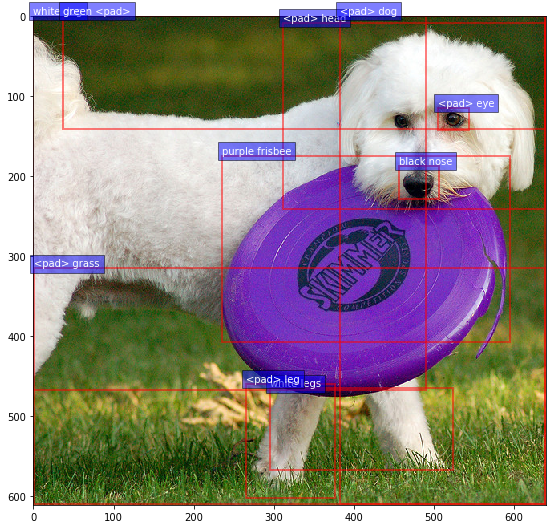

In [41]:
im_file = 'data/train2014/COCO_train2014_000000000394.jpg'
im = cv2.imread(im_file)

train_img2idx = pickle.load(
    open(os.path.join(data_path,'train100_imgid2idx.pkl'), 'rb'))
im_idx = train_img2idx[int(im_file.split("_")[-1].lstrip("0").split(".")[0])]

train_hf = h5py.File(os.path.join(data_path, "train100.hdf5"), "r")
num_boxes = 10
train_boxes = train_hf["image_bb"]
train_classes = train_hf["classes"]
train_attributes = train_hf["attributes"]


im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

boxes = train_boxes[im_idx]
objects = train_classes[im_idx]
obj_attrs = train_attributes[im_idx]
print(im_idx)
print(objects)
print(obj_attrs)

for i in range(num_boxes):
    bbox = boxes[i]

    cls = classes[int(objects[i])]
    cls = attributes[int(obj_attrs[i])] + " " + cls
    plt.gca().add_patch(
        plt.Rectangle((bbox[0], bbox[1]),
                      bbox[2] - bbox[0],
                      bbox[3] - bbox[1], fill=False,
                      edgecolor='red', linewidth=2, alpha=0.5)
            )
    plt.gca().text(bbox[0], bbox[1] - 2,
                '%s' % (cls),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=10, color='white')
print 'boxes=%d' % (len(keep_boxes))